<a href="https://colab.research.google.com/github/MPGarg/Assignment-6/blob/main/EVA8_Assigment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
from __future__ import print_function
import torch.optim as optim
from torchvision import datasets, transforms
import torch
import torch.nn.functional as F
import torchvision
from torchsummary import summary
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
#!pip install -U albumentations

# Import files from Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Insert the directory
import sys
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks/Assignment6')

# Net is class for model

In [5]:
import model_cifar10
from model_cifar10 import Net

# Import Other fuctions

In [6]:
import utility
import model_transpose
import train_test

from train_test import train, test, train_test_model
from utility import load_data, set_albumen_params, display_incorrect_pred
from model_transpose import cifar_ds10, tl_ts_mod 

# Assign device

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [8]:
view_model = Net().to(device)
summary(view_model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
         Dropout2d-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 32, 15, 15]          18,464
      BatchNorm2d-10           [-1, 32, 15, 15]              64
             ReLU-11           [-1, 32, 15, 15]               0
        Dropout2d-12           [-1, 32, 15, 15]               0
           Conv2d-13           [-1, 32, 15, 15]           9,216
      BatchNorm2d-14           [-1, 32,

# Train & Test Model

In [9]:
trl, trs = load_data()
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

mean = list(np.round(trs.data.mean(axis=(0,1,2))/255, 4))
std = list(np.round(trs.data.std(axis=(0,1,2))/255,4))
     
transform_train, transform_valid = set_albumen_params(mean, std)
trainset_mod, trainloader_mod, testset_mod, testloader_mod = tl_ts_mod(transform_train,transform_valid)

model = Net(dropout=0.02, normalization='BN').to(device)    
net_ret, wrong_prediction_list, train_losses, train_acc, test_losses, test_acc = train_test_model(model, trainloader_mod, testloader_mod, 'BN', 300, 0.005, device )
     

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
EPOCH: 1


100%|██████████| 391/391 [00:12<00:00, 32.25it/s]


Average Training Loss=1.830892477874756, Accuracy=32.83


Test set: Average loss: 1.5245, Accuracy: 4273/10000 (42.73%)

EPOCH: 2


100%|██████████| 391/391 [00:11<00:00, 34.83it/s]


Average Training Loss=1.6094785815429689, Accuracy=42.22


Test set: Average loss: 1.3439, Accuracy: 5129/10000 (51.29%)

EPOCH: 3


100%|██████████| 391/391 [00:12<00:00, 32.51it/s]


Average Training Loss=1.5069681774902344, Accuracy=46.202


Test set: Average loss: 1.2584, Accuracy: 5462/10000 (54.62%)

EPOCH: 4


100%|██████████| 391/391 [00:11<00:00, 34.06it/s]


Average Training Loss=1.4251678619384767, Accuracy=49.678


Test set: Average loss: 1.2167, Accuracy: 5673/10000 (56.73%)

EPOCH: 5


100%|██████████| 391/391 [00:11<00:00, 34.12it/s]


Average Training Loss=1.3511429122924805, Accuracy=52.718


Test set: Average loss: 1.1150, Accuracy: 6011/10000 (60.11%)

EPOCH: 6


100%|██████████| 391/391 [00:14<00:00, 26.83it/s]


Average Training Loss=1.2954417176818849, Accuracy=54.986


Test set: Average loss: 1.0231, Accuracy: 6373/10000 (63.73%)

EPOCH: 7


100%|██████████| 391/391 [00:11<00:00, 33.85it/s]


Average Training Loss=1.2332477740478516, Accuracy=56.98


Test set: Average loss: 1.0117, Accuracy: 6465/10000 (64.65%)

EPOCH: 8


100%|██████████| 391/391 [00:11<00:00, 34.21it/s]


Average Training Loss=1.1976763330078124, Accuracy=58.508


Test set: Average loss: 0.9164, Accuracy: 6742/10000 (67.42%)

EPOCH: 9


100%|██████████| 391/391 [00:13<00:00, 29.91it/s]


Average Training Loss=1.1619841374206543, Accuracy=60.07


Test set: Average loss: 0.8737, Accuracy: 6928/10000 (69.28%)

EPOCH: 10


100%|██████████| 391/391 [00:11<00:00, 33.92it/s]


Average Training Loss=1.1346940930175782, Accuracy=61.038


Test set: Average loss: 0.9010, Accuracy: 6815/10000 (68.15%)

EPOCH: 11


100%|██████████| 391/391 [00:11<00:00, 34.15it/s]


Average Training Loss=1.1047332524108886, Accuracy=61.882


Test set: Average loss: 0.8473, Accuracy: 7007/10000 (70.07%)

EPOCH: 12


100%|██████████| 391/391 [00:11<00:00, 33.01it/s]


Average Training Loss=1.0869871133422853, Accuracy=62.774


Test set: Average loss: 0.8246, Accuracy: 7139/10000 (71.39%)

EPOCH: 13


100%|██████████| 391/391 [00:11<00:00, 33.99it/s]


Average Training Loss=1.0560364434814453, Accuracy=63.786


Test set: Average loss: 0.7932, Accuracy: 7283/10000 (72.83%)

EPOCH: 14


100%|██████████| 391/391 [00:11<00:00, 33.97it/s]


Average Training Loss=1.0432775685119628, Accuracy=64.59


Test set: Average loss: 0.7671, Accuracy: 7345/10000 (73.45%)

EPOCH: 15


100%|██████████| 391/391 [00:11<00:00, 33.50it/s]


Average Training Loss=1.0344210499572755, Accuracy=64.956


Test set: Average loss: 0.7697, Accuracy: 7327/10000 (73.27%)

EPOCH: 16


100%|██████████| 391/391 [00:11<00:00, 33.76it/s]


Average Training Loss=1.0075263302612305, Accuracy=65.696


Test set: Average loss: 0.7555, Accuracy: 7397/10000 (73.97%)

EPOCH: 17


100%|██████████| 391/391 [00:11<00:00, 34.35it/s]


Average Training Loss=0.9886151022338867, Accuracy=66.424


Test set: Average loss: 0.7228, Accuracy: 7552/10000 (75.52%)

EPOCH: 18


100%|██████████| 391/391 [00:11<00:00, 34.74it/s]


Average Training Loss=0.9804759471130371, Accuracy=66.688


Test set: Average loss: 0.7258, Accuracy: 7500/10000 (75.00%)

EPOCH: 19


100%|██████████| 391/391 [00:11<00:00, 34.87it/s]


Average Training Loss=0.9619223748779296, Accuracy=67.284


Test set: Average loss: 0.7397, Accuracy: 7434/10000 (74.34%)

EPOCH: 20


100%|██████████| 391/391 [00:11<00:00, 34.71it/s]


Average Training Loss=0.959189028930664, Accuracy=67.354


Test set: Average loss: 0.7119, Accuracy: 7580/10000 (75.80%)

EPOCH: 21


100%|██████████| 391/391 [00:11<00:00, 35.25it/s]


Average Training Loss=0.9504178497314453, Accuracy=67.836


Test set: Average loss: 0.7055, Accuracy: 7562/10000 (75.62%)

EPOCH: 22


100%|██████████| 391/391 [00:11<00:00, 34.73it/s]


Average Training Loss=0.9386303489685058, Accuracy=68.304


Test set: Average loss: 0.6726, Accuracy: 7693/10000 (76.93%)

EPOCH: 23


100%|██████████| 391/391 [00:11<00:00, 35.02it/s]


Average Training Loss=0.9287740989685058, Accuracy=68.6


Test set: Average loss: 0.6980, Accuracy: 7629/10000 (76.29%)

EPOCH: 24


100%|██████████| 391/391 [00:11<00:00, 35.01it/s]


Average Training Loss=0.9282769100952148, Accuracy=68.844


Test set: Average loss: 0.6699, Accuracy: 7783/10000 (77.83%)

EPOCH: 25


100%|██████████| 391/391 [00:11<00:00, 34.45it/s]


Average Training Loss=0.9096460945129394, Accuracy=69.318


Test set: Average loss: 0.6544, Accuracy: 7772/10000 (77.72%)

EPOCH: 26


100%|██████████| 391/391 [00:11<00:00, 35.22it/s]


Average Training Loss=0.9063155876159668, Accuracy=69.382


Test set: Average loss: 0.6712, Accuracy: 7702/10000 (77.02%)

EPOCH: 27


100%|██████████| 391/391 [00:11<00:00, 35.11it/s]


Average Training Loss=0.9023718716430664, Accuracy=69.638


Test set: Average loss: 0.6494, Accuracy: 7776/10000 (77.76%)

EPOCH: 28


100%|██████████| 391/391 [00:11<00:00, 34.89it/s]


Average Training Loss=0.8976171282958985, Accuracy=69.888


Test set: Average loss: 0.6674, Accuracy: 7724/10000 (77.24%)

EPOCH: 29


100%|██████████| 391/391 [00:12<00:00, 31.11it/s]


Average Training Loss=0.8840744543457031, Accuracy=70.008


Test set: Average loss: 0.6555, Accuracy: 7780/10000 (77.80%)

EPOCH: 30


100%|██████████| 391/391 [00:11<00:00, 34.60it/s]


Average Training Loss=0.879784662475586, Accuracy=70.26


Test set: Average loss: 0.6432, Accuracy: 7852/10000 (78.52%)

EPOCH: 31


100%|██████████| 391/391 [00:11<00:00, 34.76it/s]


Average Training Loss=0.8793642381286622, Accuracy=70.248


Test set: Average loss: 0.6262, Accuracy: 7906/10000 (79.06%)

EPOCH: 32


100%|██████████| 391/391 [00:11<00:00, 34.77it/s]


Average Training Loss=0.867572359161377, Accuracy=70.776


Test set: Average loss: 0.6103, Accuracy: 7938/10000 (79.38%)

EPOCH: 33


100%|██████████| 391/391 [00:11<00:00, 35.00it/s]


Average Training Loss=0.865209058227539, Accuracy=70.876


Test set: Average loss: 0.6004, Accuracy: 7999/10000 (79.99%)

EPOCH: 34


100%|██████████| 391/391 [00:11<00:00, 34.58it/s]


Average Training Loss=0.8542691871643067, Accuracy=71.234


Test set: Average loss: 0.6164, Accuracy: 7890/10000 (78.90%)

EPOCH: 35


100%|██████████| 391/391 [00:11<00:00, 34.35it/s]


Average Training Loss=0.8614689744567872, Accuracy=71.322


Test set: Average loss: 0.6164, Accuracy: 7915/10000 (79.15%)

EPOCH: 36


100%|██████████| 391/391 [00:11<00:00, 34.69it/s]


Average Training Loss=0.8530003886413574, Accuracy=71.472


Test set: Average loss: 0.6104, Accuracy: 7990/10000 (79.90%)

EPOCH: 37


100%|██████████| 391/391 [00:11<00:00, 34.42it/s]


Average Training Loss=0.8485050135803223, Accuracy=71.532


Test set: Average loss: 0.6124, Accuracy: 7939/10000 (79.39%)

EPOCH: 38


100%|██████████| 391/391 [00:11<00:00, 35.09it/s]


Average Training Loss=0.8383252235412597, Accuracy=71.902


Test set: Average loss: 0.6225, Accuracy: 7901/10000 (79.01%)

EPOCH: 39


100%|██████████| 391/391 [00:11<00:00, 34.55it/s]


Average Training Loss=0.8439214018249511, Accuracy=71.848


Test set: Average loss: 0.6107, Accuracy: 7945/10000 (79.45%)

EPOCH: 40


100%|██████████| 391/391 [00:11<00:00, 34.46it/s]


Average Training Loss=0.8318976203918457, Accuracy=72.304


Test set: Average loss: 0.5998, Accuracy: 7995/10000 (79.95%)

EPOCH: 41


100%|██████████| 391/391 [00:11<00:00, 34.69it/s]


Average Training Loss=0.8311656538391113, Accuracy=72.186


Test set: Average loss: 0.6012, Accuracy: 7970/10000 (79.70%)

EPOCH: 42


100%|██████████| 391/391 [00:11<00:00, 34.57it/s]


Average Training Loss=0.8301942416381836, Accuracy=72.07


Test set: Average loss: 0.6017, Accuracy: 8009/10000 (80.09%)

EPOCH: 43


100%|██████████| 391/391 [00:11<00:00, 34.39it/s]


Average Training Loss=0.825327557220459, Accuracy=72.262


Test set: Average loss: 0.5863, Accuracy: 8063/10000 (80.63%)

EPOCH: 44


100%|██████████| 391/391 [00:11<00:00, 34.12it/s]


Average Training Loss=0.8172974900054931, Accuracy=72.576


Test set: Average loss: 0.5828, Accuracy: 8052/10000 (80.52%)

EPOCH: 45


100%|██████████| 391/391 [00:11<00:00, 34.31it/s]


Average Training Loss=0.8136045203399658, Accuracy=72.774


Test set: Average loss: 0.5657, Accuracy: 8102/10000 (81.02%)

EPOCH: 46


100%|██████████| 391/391 [00:11<00:00, 34.55it/s]


Average Training Loss=0.8147885299682617, Accuracy=72.776


Test set: Average loss: 0.5800, Accuracy: 8042/10000 (80.42%)

EPOCH: 47


100%|██████████| 391/391 [00:11<00:00, 34.82it/s]


Average Training Loss=0.806643949432373, Accuracy=73.036


Test set: Average loss: 0.5750, Accuracy: 8042/10000 (80.42%)

EPOCH: 48


100%|██████████| 391/391 [00:12<00:00, 30.13it/s]


Average Training Loss=0.8083698718261719, Accuracy=72.9


Test set: Average loss: 0.5761, Accuracy: 8052/10000 (80.52%)

EPOCH: 49


100%|██████████| 391/391 [00:11<00:00, 34.19it/s]


Average Training Loss=0.8051734058380127, Accuracy=73.118


Test set: Average loss: 0.5697, Accuracy: 8113/10000 (81.13%)

EPOCH: 50


100%|██████████| 391/391 [00:11<00:00, 34.24it/s]


Average Training Loss=0.8037000245666504, Accuracy=73.098


Test set: Average loss: 0.5718, Accuracy: 8113/10000 (81.13%)

EPOCH: 51


100%|██████████| 391/391 [00:11<00:00, 34.41it/s]


Average Training Loss=0.8045549507141113, Accuracy=72.93


Test set: Average loss: 0.5607, Accuracy: 8122/10000 (81.22%)

EPOCH: 52


100%|██████████| 391/391 [00:11<00:00, 33.94it/s]


Average Training Loss=0.7992947821807861, Accuracy=73.198


Test set: Average loss: 0.5566, Accuracy: 8163/10000 (81.63%)

EPOCH: 53


100%|██████████| 391/391 [00:11<00:00, 34.25it/s]


Average Training Loss=0.7937978910827637, Accuracy=73.428


Test set: Average loss: 0.5606, Accuracy: 8116/10000 (81.16%)

EPOCH: 54


100%|██████████| 391/391 [00:11<00:00, 33.71it/s]


Average Training Loss=0.793410343322754, Accuracy=73.108


Test set: Average loss: 0.5460, Accuracy: 8197/10000 (81.97%)

EPOCH: 55


100%|██████████| 391/391 [00:11<00:00, 34.30it/s]



Average Training Loss=0.7831745018005372, Accuracy=73.708
Test set: Average loss: 0.5746, Accuracy: 8087/10000 (80.87%)

EPOCH: 56


100%|██████████| 391/391 [00:11<00:00, 33.88it/s]


Average Training Loss=0.7919970988464355, Accuracy=73.576


Test set: Average loss: 0.5516, Accuracy: 8182/10000 (81.82%)

EPOCH: 57


100%|██████████| 391/391 [00:11<00:00, 34.35it/s]


Average Training Loss=0.7817951900482177, Accuracy=73.7


Test set: Average loss: 0.5533, Accuracy: 8170/10000 (81.70%)

EPOCH: 58


100%|██████████| 391/391 [00:11<00:00, 33.74it/s]


Average Training Loss=0.7789155221557618, Accuracy=73.944


Test set: Average loss: 0.5694, Accuracy: 8114/10000 (81.14%)

EPOCH: 59


100%|██████████| 391/391 [00:11<00:00, 34.20it/s]


Average Training Loss=0.7757936325073242, Accuracy=74.162


Test set: Average loss: 0.5685, Accuracy: 8098/10000 (80.98%)

EPOCH: 60


100%|██████████| 391/391 [00:11<00:00, 33.63it/s]


Average Training Loss=0.7752147593688965, Accuracy=73.99


Test set: Average loss: 0.5394, Accuracy: 8208/10000 (82.08%)

EPOCH: 61


100%|██████████| 391/391 [00:11<00:00, 33.97it/s]


Average Training Loss=0.772109924621582, Accuracy=74.102


Test set: Average loss: 0.5562, Accuracy: 8128/10000 (81.28%)

EPOCH: 62


100%|██████████| 391/391 [00:11<00:00, 33.62it/s]



Average Training Loss=0.7715319638061523, Accuracy=74.292
Test set: Average loss: 0.5455, Accuracy: 8171/10000 (81.71%)

EPOCH: 63


100%|██████████| 391/391 [00:11<00:00, 33.79it/s]


Average Training Loss=0.7730483210754394, Accuracy=74.158


Test set: Average loss: 0.5445, Accuracy: 8170/10000 (81.70%)

EPOCH: 64


100%|██████████| 391/391 [00:11<00:00, 34.11it/s]


Average Training Loss=0.7727168872070312, Accuracy=74.134


Test set: Average loss: 0.5409, Accuracy: 8220/10000 (82.20%)

EPOCH: 65


100%|██████████| 391/391 [00:11<00:00, 33.97it/s]


Average Training Loss=0.7667005270385742, Accuracy=74.516


Test set: Average loss: 0.5289, Accuracy: 8245/10000 (82.45%)

EPOCH: 66


100%|██████████| 391/391 [00:11<00:00, 33.71it/s]


Average Training Loss=0.7602328861999512, Accuracy=74.514


Test set: Average loss: 0.5477, Accuracy: 8192/10000 (81.92%)

EPOCH: 67


100%|██████████| 391/391 [00:11<00:00, 34.09it/s]


Average Training Loss=0.7614418109130859, Accuracy=74.538


Test set: Average loss: 0.5390, Accuracy: 8210/10000 (82.10%)

EPOCH: 68


100%|██████████| 391/391 [00:13<00:00, 29.29it/s]


Average Training Loss=0.760678021850586, Accuracy=74.626


Test set: Average loss: 0.5442, Accuracy: 8203/10000 (82.03%)

EPOCH: 69


100%|██████████| 391/391 [00:11<00:00, 33.97it/s]



Average Training Loss=0.7523044445037842, Accuracy=74.798
Test set: Average loss: 0.5362, Accuracy: 8214/10000 (82.14%)

EPOCH: 70


100%|██████████| 391/391 [00:11<00:00, 33.91it/s]


Average Training Loss=0.7528335190582275, Accuracy=74.75


Test set: Average loss: 0.5310, Accuracy: 8280/10000 (82.80%)

EPOCH: 71


100%|██████████| 391/391 [00:11<00:00, 34.45it/s]


Average Training Loss=0.7528955995941162, Accuracy=74.682


Test set: Average loss: 0.5394, Accuracy: 8221/10000 (82.21%)

EPOCH: 72


100%|██████████| 391/391 [00:11<00:00, 34.12it/s]


Average Training Loss=0.7586014453125, Accuracy=74.528


Test set: Average loss: 0.5494, Accuracy: 8154/10000 (81.54%)

EPOCH: 73


100%|██████████| 391/391 [00:11<00:00, 34.24it/s]


Average Training Loss=0.7524412251281738, Accuracy=75.004


Test set: Average loss: 0.5294, Accuracy: 8234/10000 (82.34%)

EPOCH: 74


100%|██████████| 391/391 [00:11<00:00, 34.16it/s]


Average Training Loss=0.7502967213439942, Accuracy=74.976


Test set: Average loss: 0.5257, Accuracy: 8216/10000 (82.16%)

EPOCH: 75


100%|██████████| 391/391 [00:11<00:00, 34.08it/s]


Average Training Loss=0.7451403204345703, Accuracy=75.116


Test set: Average loss: 0.5238, Accuracy: 8276/10000 (82.76%)

EPOCH: 76


100%|██████████| 391/391 [00:11<00:00, 34.16it/s]


Average Training Loss=0.7452939796447754, Accuracy=75.292


Test set: Average loss: 0.5242, Accuracy: 8254/10000 (82.54%)

EPOCH: 77


100%|██████████| 391/391 [00:11<00:00, 34.44it/s]


Average Training Loss=0.7472318230438233, Accuracy=75.024


Test set: Average loss: 0.5260, Accuracy: 8251/10000 (82.51%)

EPOCH: 78


100%|██████████| 391/391 [00:11<00:00, 34.48it/s]


Average Training Loss=0.7422918334960937, Accuracy=75.238


Test set: Average loss: 0.5218, Accuracy: 8279/10000 (82.79%)

EPOCH: 79


100%|██████████| 391/391 [00:11<00:00, 34.23it/s]


Average Training Loss=0.7454555596160889, Accuracy=74.968


Test set: Average loss: 0.5226, Accuracy: 8257/10000 (82.57%)

EPOCH: 80


100%|██████████| 391/391 [00:11<00:00, 34.02it/s]


Average Training Loss=0.7347784851074218, Accuracy=75.486


Test set: Average loss: 0.5184, Accuracy: 8268/10000 (82.68%)

EPOCH: 81


100%|██████████| 391/391 [00:11<00:00, 33.26it/s]


Average Training Loss=0.7431434058380127, Accuracy=75.166


Test set: Average loss: 0.5229, Accuracy: 8287/10000 (82.87%)

EPOCH: 82


100%|██████████| 391/391 [00:11<00:00, 33.38it/s]


Average Training Loss=0.7368107959747314, Accuracy=75.5


Test set: Average loss: 0.5239, Accuracy: 8260/10000 (82.60%)

EPOCH: 83


100%|██████████| 391/391 [00:11<00:00, 33.36it/s]


Average Training Loss=0.7399713253021241, Accuracy=75.418


Test set: Average loss: 0.5106, Accuracy: 8302/10000 (83.02%)

EPOCH: 84


100%|██████████| 391/391 [00:11<00:00, 33.41it/s]


Average Training Loss=0.734762707901001, Accuracy=75.498


Test set: Average loss: 0.5204, Accuracy: 8304/10000 (83.04%)

EPOCH: 85


100%|██████████| 391/391 [00:11<00:00, 33.79it/s]


Average Training Loss=0.7356076879882812, Accuracy=75.36


Test set: Average loss: 0.5242, Accuracy: 8235/10000 (82.35%)

EPOCH: 86


100%|██████████| 391/391 [00:11<00:00, 33.51it/s]


Average Training Loss=0.7256359365081787, Accuracy=75.856


Test set: Average loss: 0.5103, Accuracy: 8252/10000 (82.52%)

EPOCH: 87


100%|██████████| 391/391 [00:13<00:00, 29.49it/s]


Average Training Loss=0.7314933890533447, Accuracy=75.778


Test set: Average loss: 0.5132, Accuracy: 8312/10000 (83.12%)

EPOCH: 88


100%|██████████| 391/391 [00:11<00:00, 33.68it/s]


Average Training Loss=0.7296797594451905, Accuracy=75.58


Test set: Average loss: 0.5129, Accuracy: 8308/10000 (83.08%)

EPOCH: 89


100%|██████████| 391/391 [00:11<00:00, 33.38it/s]


Average Training Loss=0.7324383167266846, Accuracy=75.604


Test set: Average loss: 0.5073, Accuracy: 8326/10000 (83.26%)

EPOCH: 90


100%|██████████| 391/391 [00:11<00:00, 33.45it/s]


Average Training Loss=0.7256594675445557, Accuracy=75.578


Test set: Average loss: 0.5025, Accuracy: 8322/10000 (83.22%)

EPOCH: 91


100%|██████████| 391/391 [00:11<00:00, 33.82it/s]


Average Training Loss=0.7257610050964356, Accuracy=75.776


Test set: Average loss: 0.5141, Accuracy: 8291/10000 (82.91%)

EPOCH: 92


100%|██████████| 391/391 [00:11<00:00, 33.50it/s]


Average Training Loss=0.7222737911987305, Accuracy=75.972


Test set: Average loss: 0.5313, Accuracy: 8241/10000 (82.41%)

EPOCH: 93


100%|██████████| 391/391 [00:11<00:00, 33.49it/s]


Average Training Loss=0.7248819660186767, Accuracy=76.084


Test set: Average loss: 0.5040, Accuracy: 8344/10000 (83.44%)

EPOCH: 94


100%|██████████| 391/391 [00:11<00:00, 33.30it/s]


Average Training Loss=0.7179232856750488, Accuracy=76.016


Test set: Average loss: 0.5099, Accuracy: 8358/10000 (83.58%)

EPOCH: 95


100%|██████████| 391/391 [00:11<00:00, 33.78it/s]


Average Training Loss=0.721232485961914, Accuracy=75.99


Test set: Average loss: 0.5040, Accuracy: 8369/10000 (83.69%)

EPOCH: 96


100%|██████████| 391/391 [00:11<00:00, 33.90it/s]


Average Training Loss=0.7188195362854004, Accuracy=76.018


Test set: Average loss: 0.5226, Accuracy: 8278/10000 (82.78%)

EPOCH: 97


100%|██████████| 391/391 [00:11<00:00, 33.79it/s]


Average Training Loss=0.7205769997406006, Accuracy=75.91


Test set: Average loss: 0.4963, Accuracy: 8381/10000 (83.81%)

EPOCH: 98


100%|██████████| 391/391 [00:11<00:00, 33.67it/s]


Average Training Loss=0.7167107697296142, Accuracy=76.136


Test set: Average loss: 0.4964, Accuracy: 8355/10000 (83.55%)

EPOCH: 99


100%|██████████| 391/391 [00:11<00:00, 33.80it/s]



Average Training Loss=0.7181512995147705, Accuracy=76.15
Test set: Average loss: 0.4967, Accuracy: 8375/10000 (83.75%)

EPOCH: 100


100%|██████████| 391/391 [00:11<00:00, 33.80it/s]


Average Training Loss=0.7130840160369873, Accuracy=76.106


Test set: Average loss: 0.5131, Accuracy: 8310/10000 (83.10%)

EPOCH: 101


100%|██████████| 391/391 [00:11<00:00, 33.91it/s]


Average Training Loss=0.6837870478820801, Accuracy=77.376


Test set: Average loss: 0.4790, Accuracy: 8425/10000 (84.25%)

EPOCH: 102


100%|██████████| 391/391 [00:11<00:00, 33.98it/s]


Average Training Loss=0.6738413065338135, Accuracy=77.766


Test set: Average loss: 0.4768, Accuracy: 8436/10000 (84.36%)

EPOCH: 103


100%|██████████| 391/391 [00:11<00:00, 34.38it/s]


Average Training Loss=0.6749892073059082, Accuracy=77.376


Test set: Average loss: 0.4793, Accuracy: 8423/10000 (84.23%)

EPOCH: 104


100%|██████████| 391/391 [00:11<00:00, 34.12it/s]


Average Training Loss=0.6742267761993408, Accuracy=77.54


Test set: Average loss: 0.4801, Accuracy: 8455/10000 (84.55%)

EPOCH: 105


100%|██████████| 391/391 [00:11<00:00, 34.88it/s]


Average Training Loss=0.6692389408874512, Accuracy=77.824


Test set: Average loss: 0.4770, Accuracy: 8445/10000 (84.45%)

EPOCH: 106


100%|██████████| 391/391 [00:12<00:00, 31.62it/s]


Average Training Loss=0.6658900304412841, Accuracy=77.808


Test set: Average loss: 0.4758, Accuracy: 8455/10000 (84.55%)

EPOCH: 107


100%|██████████| 391/391 [00:11<00:00, 33.27it/s]


Average Training Loss=0.6634004364013671, Accuracy=77.774


Test set: Average loss: 0.4739, Accuracy: 8448/10000 (84.48%)

EPOCH: 108


100%|██████████| 391/391 [00:11<00:00, 33.64it/s]


Average Training Loss=0.6667367417144775, Accuracy=77.76


Test set: Average loss: 0.4710, Accuracy: 8471/10000 (84.71%)

EPOCH: 109


100%|██████████| 391/391 [00:11<00:00, 34.03it/s]


Average Training Loss=0.6673726815795898, Accuracy=77.764


Test set: Average loss: 0.4726, Accuracy: 8464/10000 (84.64%)

EPOCH: 110


100%|██████████| 391/391 [00:11<00:00, 33.72it/s]


Average Training Loss=0.6680722337341308, Accuracy=77.764


Test set: Average loss: 0.4760, Accuracy: 8449/10000 (84.49%)

EPOCH: 111


100%|██████████| 391/391 [00:11<00:00, 34.15it/s]


Average Training Loss=0.6657797171020507, Accuracy=77.658


Test set: Average loss: 0.4737, Accuracy: 8452/10000 (84.52%)

EPOCH: 112


100%|██████████| 391/391 [00:11<00:00, 33.84it/s]


Average Training Loss=0.6633918679809571, Accuracy=77.902


Test set: Average loss: 0.4720, Accuracy: 8454/10000 (84.54%)

EPOCH: 113


100%|██████████| 391/391 [00:11<00:00, 34.22it/s]


Average Training Loss=0.6614627312469482, Accuracy=77.942


Test set: Average loss: 0.4774, Accuracy: 8442/10000 (84.42%)

EPOCH: 114


100%|██████████| 391/391 [00:11<00:00, 34.09it/s]


Average Training Loss=0.6594211403656006, Accuracy=78.014


Test set: Average loss: 0.4745, Accuracy: 8458/10000 (84.58%)

EPOCH: 115


100%|██████████| 391/391 [00:11<00:00, 33.99it/s]


Average Training Loss=0.6560611450195313, Accuracy=78.024


Test set: Average loss: 0.4757, Accuracy: 8461/10000 (84.61%)

EPOCH: 116


100%|██████████| 391/391 [00:11<00:00, 34.61it/s]


Average Training Loss=0.6613943071746826, Accuracy=77.956


Test set: Average loss: 0.4710, Accuracy: 8476/10000 (84.76%)

EPOCH: 117


100%|██████████| 391/391 [00:11<00:00, 34.06it/s]


Average Training Loss=0.661967458114624, Accuracy=78.104


Test set: Average loss: 0.4738, Accuracy: 8473/10000 (84.73%)

EPOCH: 118


100%|██████████| 391/391 [00:11<00:00, 34.46it/s]


Average Training Loss=0.6618555958557129, Accuracy=77.754


Test set: Average loss: 0.4756, Accuracy: 8433/10000 (84.33%)

EPOCH: 119


100%|██████████| 391/391 [00:11<00:00, 34.20it/s]


Average Training Loss=0.6589252234649658, Accuracy=78.022


Test set: Average loss: 0.4732, Accuracy: 8448/10000 (84.48%)

EPOCH: 120


100%|██████████| 391/391 [00:11<00:00, 33.82it/s]


Average Training Loss=0.6620954446411133, Accuracy=77.904


Test set: Average loss: 0.4732, Accuracy: 8451/10000 (84.51%)

EPOCH: 121


100%|██████████| 391/391 [00:11<00:00, 33.54it/s]


Average Training Loss=0.6613441622161865, Accuracy=77.79


Test set: Average loss: 0.4743, Accuracy: 8444/10000 (84.44%)

EPOCH: 122


100%|██████████| 391/391 [00:11<00:00, 33.64it/s]


Average Training Loss=0.658942682800293, Accuracy=78.252


Test set: Average loss: 0.4745, Accuracy: 8452/10000 (84.52%)

EPOCH: 123


100%|██████████| 391/391 [00:11<00:00, 33.76it/s]


Average Training Loss=0.6542841006469726, Accuracy=78.128


Test set: Average loss: 0.4750, Accuracy: 8466/10000 (84.66%)

EPOCH: 124


100%|██████████| 391/391 [00:11<00:00, 33.09it/s]


Average Training Loss=0.6535378408050537, Accuracy=78.322


Test set: Average loss: 0.4770, Accuracy: 8419/10000 (84.19%)

EPOCH: 125


100%|██████████| 391/391 [00:11<00:00, 32.82it/s]


Average Training Loss=0.6517849017333984, Accuracy=78.414


Test set: Average loss: 0.4755, Accuracy: 8430/10000 (84.30%)

EPOCH: 126


100%|██████████| 391/391 [00:12<00:00, 31.67it/s]


Average Training Loss=0.6536084004211425, Accuracy=78.142


Test set: Average loss: 0.4767, Accuracy: 8449/10000 (84.49%)

EPOCH: 127


100%|██████████| 391/391 [00:11<00:00, 33.94it/s]


Average Training Loss=0.6666952030944824, Accuracy=78.042


Test set: Average loss: 0.4726, Accuracy: 8481/10000 (84.81%)

EPOCH: 128


100%|██████████| 391/391 [00:11<00:00, 34.19it/s]


Average Training Loss=0.6602395909118652, Accuracy=77.962


Test set: Average loss: 0.4685, Accuracy: 8474/10000 (84.74%)

EPOCH: 129


100%|██████████| 391/391 [00:11<00:00, 33.92it/s]



Average Training Loss=0.6530778538513183, Accuracy=78.268
Test set: Average loss: 0.4760, Accuracy: 8436/10000 (84.36%)

EPOCH: 130


100%|██████████| 391/391 [00:11<00:00, 33.78it/s]


Average Training Loss=0.6611563120269776, Accuracy=78.186


Test set: Average loss: 0.4723, Accuracy: 8470/10000 (84.70%)

EPOCH: 131


100%|██████████| 391/391 [00:11<00:00, 33.88it/s]


Average Training Loss=0.6550105378723144, Accuracy=78.062


Test set: Average loss: 0.4843, Accuracy: 8429/10000 (84.29%)

EPOCH: 132


100%|██████████| 391/391 [00:11<00:00, 34.05it/s]


Average Training Loss=0.6516048011779785, Accuracy=78.314


Test set: Average loss: 0.4763, Accuracy: 8442/10000 (84.42%)

EPOCH: 133


100%|██████████| 391/391 [00:11<00:00, 33.62it/s]


Average Training Loss=0.655186329574585, Accuracy=78.194


Test set: Average loss: 0.4751, Accuracy: 8432/10000 (84.32%)

EPOCH: 134


100%|██████████| 391/391 [00:11<00:00, 33.91it/s]


Average Training Loss=0.6502488276672364, Accuracy=78.428


Test set: Average loss: 0.4739, Accuracy: 8456/10000 (84.56%)

EPOCH: 135


100%|██████████| 391/391 [00:11<00:00, 34.08it/s]


Average Training Loss=0.6517143286895752, Accuracy=78.32


Test set: Average loss: 0.4766, Accuracy: 8437/10000 (84.37%)

EPOCH: 136


100%|██████████| 391/391 [00:11<00:00, 33.58it/s]


Average Training Loss=0.6508775113677978, Accuracy=78.3


Test set: Average loss: 0.4750, Accuracy: 8466/10000 (84.66%)

EPOCH: 137


100%|██████████| 391/391 [00:11<00:00, 33.74it/s]


Average Training Loss=0.6538058251953125, Accuracy=78.466


Test set: Average loss: 0.4729, Accuracy: 8458/10000 (84.58%)

EPOCH: 138


100%|██████████| 391/391 [00:11<00:00, 33.77it/s]


Average Training Loss=0.6405876619720459, Accuracy=78.634


Test set: Average loss: 0.4713, Accuracy: 8463/10000 (84.63%)

EPOCH: 139


100%|██████████| 391/391 [00:11<00:00, 34.27it/s]


Average Training Loss=0.6519664275360108, Accuracy=78.328


Test set: Average loss: 0.4685, Accuracy: 8477/10000 (84.77%)

EPOCH: 140


100%|██████████| 391/391 [00:11<00:00, 34.25it/s]


Average Training Loss=0.6480488890838623, Accuracy=78.302


Test set: Average loss: 0.4752, Accuracy: 8452/10000 (84.52%)

EPOCH: 141


100%|██████████| 391/391 [00:11<00:00, 33.84it/s]


Average Training Loss=0.6440277250671387, Accuracy=78.702


Test set: Average loss: 0.4704, Accuracy: 8483/10000 (84.83%)

EPOCH: 142


100%|██████████| 391/391 [00:11<00:00, 34.12it/s]


Average Training Loss=0.6463938480377197, Accuracy=78.428


Test set: Average loss: 0.4677, Accuracy: 8462/10000 (84.62%)

EPOCH: 143


100%|██████████| 391/391 [00:11<00:00, 33.78it/s]


Average Training Loss=0.6476572340393066, Accuracy=78.498


Test set: Average loss: 0.4683, Accuracy: 8462/10000 (84.62%)

EPOCH: 144


100%|██████████| 391/391 [00:11<00:00, 33.45it/s]


Average Training Loss=0.650848620223999, Accuracy=78.31


Test set: Average loss: 0.4676, Accuracy: 8478/10000 (84.78%)

EPOCH: 145


100%|██████████| 391/391 [00:12<00:00, 31.95it/s]


Average Training Loss=0.6456596800231934, Accuracy=78.638


Test set: Average loss: 0.4712, Accuracy: 8481/10000 (84.81%)

EPOCH: 146


100%|██████████| 391/391 [00:11<00:00, 34.22it/s]


Average Training Loss=0.648580793762207, Accuracy=78.564


Test set: Average loss: 0.4726, Accuracy: 8454/10000 (84.54%)

EPOCH: 147


100%|██████████| 391/391 [00:11<00:00, 34.21it/s]


Average Training Loss=0.6525942372131348, Accuracy=78.178


Test set: Average loss: 0.4639, Accuracy: 8491/10000 (84.91%)

EPOCH: 148


100%|██████████| 391/391 [00:11<00:00, 33.68it/s]


Average Training Loss=0.6447045790863037, Accuracy=78.516


Test set: Average loss: 0.4739, Accuracy: 8442/10000 (84.42%)

EPOCH: 149


100%|██████████| 391/391 [00:11<00:00, 33.92it/s]


Average Training Loss=0.6472564575195312, Accuracy=78.496


Test set: Average loss: 0.4701, Accuracy: 8455/10000 (84.55%)

EPOCH: 150


100%|██████████| 391/391 [00:11<00:00, 33.70it/s]


Average Training Loss=0.650621732711792, Accuracy=78.278


Test set: Average loss: 0.4720, Accuracy: 8463/10000 (84.63%)

EPOCH: 151


100%|██████████| 391/391 [00:11<00:00, 33.55it/s]


Average Training Loss=0.6441753313446045, Accuracy=78.466


Test set: Average loss: 0.4680, Accuracy: 8467/10000 (84.67%)

EPOCH: 152


100%|██████████| 391/391 [00:11<00:00, 33.81it/s]


Average Training Loss=0.6542364113616943, Accuracy=77.97


Test set: Average loss: 0.4666, Accuracy: 8474/10000 (84.74%)

EPOCH: 153


100%|██████████| 391/391 [00:11<00:00, 33.52it/s]


Average Training Loss=0.6487861853027344, Accuracy=78.426


Test set: Average loss: 0.4693, Accuracy: 8462/10000 (84.62%)

EPOCH: 154


100%|██████████| 391/391 [00:11<00:00, 33.71it/s]


Average Training Loss=0.6370410857391358, Accuracy=78.936


Test set: Average loss: 0.4737, Accuracy: 8447/10000 (84.47%)

EPOCH: 155


100%|██████████| 391/391 [00:11<00:00, 33.56it/s]


Average Training Loss=0.6522648717498779, Accuracy=78.352


Test set: Average loss: 0.4707, Accuracy: 8460/10000 (84.60%)

EPOCH: 156


100%|██████████| 391/391 [00:11<00:00, 34.00it/s]


Average Training Loss=0.6443547186279297, Accuracy=78.434


Test set: Average loss: 0.4714, Accuracy: 8450/10000 (84.50%)

EPOCH: 157


100%|██████████| 391/391 [00:11<00:00, 33.81it/s]


Average Training Loss=0.6395910839080811, Accuracy=78.678


Test set: Average loss: 0.4661, Accuracy: 8471/10000 (84.71%)

EPOCH: 158


100%|██████████| 391/391 [00:11<00:00, 33.84it/s]


Average Training Loss=0.646242359161377, Accuracy=78.606


Test set: Average loss: 0.4796, Accuracy: 8429/10000 (84.29%)

EPOCH: 159


100%|██████████| 391/391 [00:11<00:00, 33.91it/s]


Average Training Loss=0.6446516012573242, Accuracy=78.408


Test set: Average loss: 0.4682, Accuracy: 8458/10000 (84.58%)

EPOCH: 160


100%|██████████| 391/391 [00:11<00:00, 34.11it/s]


Average Training Loss=0.6426879865264893, Accuracy=78.742


Test set: Average loss: 0.4761, Accuracy: 8459/10000 (84.59%)

EPOCH: 161


100%|██████████| 391/391 [00:11<00:00, 34.67it/s]


Average Training Loss=0.6428226918029785, Accuracy=78.722


Test set: Average loss: 0.4721, Accuracy: 8435/10000 (84.35%)

EPOCH: 162


100%|██████████| 391/391 [00:11<00:00, 34.11it/s]


Average Training Loss=0.6505078247070313, Accuracy=78.29


Test set: Average loss: 0.4708, Accuracy: 8480/10000 (84.80%)

EPOCH: 163


100%|██████████| 391/391 [00:13<00:00, 29.73it/s]


Average Training Loss=0.644679959564209, Accuracy=78.55


Test set: Average loss: 0.4655, Accuracy: 8480/10000 (84.80%)

EPOCH: 164


100%|██████████| 391/391 [00:11<00:00, 33.87it/s]


Average Training Loss=0.6451840120697021, Accuracy=78.592


Test set: Average loss: 0.4707, Accuracy: 8447/10000 (84.47%)

EPOCH: 165


100%|██████████| 391/391 [00:11<00:00, 33.74it/s]


Average Training Loss=0.6465700342559815, Accuracy=78.332


Test set: Average loss: 0.4694, Accuracy: 8459/10000 (84.59%)

EPOCH: 166


100%|██████████| 391/391 [00:11<00:00, 33.99it/s]


Average Training Loss=0.6459029471588135, Accuracy=78.628


Test set: Average loss: 0.4687, Accuracy: 8459/10000 (84.59%)

EPOCH: 167


100%|██████████| 391/391 [00:11<00:00, 33.67it/s]


Average Training Loss=0.6450728753662109, Accuracy=78.364


Test set: Average loss: 0.4697, Accuracy: 8441/10000 (84.41%)

EPOCH: 168


100%|██████████| 391/391 [00:11<00:00, 34.13it/s]


Average Training Loss=0.6414609162139893, Accuracy=78.54


Test set: Average loss: 0.4726, Accuracy: 8438/10000 (84.38%)

EPOCH: 169


100%|██████████| 391/391 [00:11<00:00, 34.07it/s]


Average Training Loss=0.648394870147705, Accuracy=78.43


Test set: Average loss: 0.4740, Accuracy: 8442/10000 (84.42%)

EPOCH: 170


100%|██████████| 391/391 [00:11<00:00, 33.71it/s]


Average Training Loss=0.6362213108062744, Accuracy=78.89


Test set: Average loss: 0.4707, Accuracy: 8465/10000 (84.65%)

EPOCH: 171


100%|██████████| 391/391 [00:11<00:00, 33.98it/s]


Average Training Loss=0.6416114960479736, Accuracy=78.588


Test set: Average loss: 0.4678, Accuracy: 8473/10000 (84.73%)

EPOCH: 172


100%|██████████| 391/391 [00:11<00:00, 33.80it/s]


Average Training Loss=0.6449355107116699, Accuracy=78.328


Test set: Average loss: 0.4662, Accuracy: 8470/10000 (84.70%)

EPOCH: 173


100%|██████████| 391/391 [00:11<00:00, 34.05it/s]


Average Training Loss=0.6410593809509277, Accuracy=78.65


Test set: Average loss: 0.4681, Accuracy: 8468/10000 (84.68%)

EPOCH: 174


100%|██████████| 391/391 [00:11<00:00, 33.78it/s]


Average Training Loss=0.638491817932129, Accuracy=78.76


Test set: Average loss: 0.4683, Accuracy: 8478/10000 (84.78%)

EPOCH: 175


100%|██████████| 391/391 [00:11<00:00, 34.17it/s]


Average Training Loss=0.6412258956909179, Accuracy=78.79


Test set: Average loss: 0.4729, Accuracy: 8441/10000 (84.41%)

EPOCH: 176


100%|██████████| 391/391 [00:11<00:00, 33.93it/s]


Average Training Loss=0.6448917860412597, Accuracy=78.542


Test set: Average loss: 0.4697, Accuracy: 8460/10000 (84.60%)

EPOCH: 177


100%|██████████| 391/391 [00:11<00:00, 34.22it/s]


Average Training Loss=0.6490008567047119, Accuracy=78.534


Test set: Average loss: 0.4689, Accuracy: 8456/10000 (84.56%)

EPOCH: 178


100%|██████████| 391/391 [00:11<00:00, 34.26it/s]


Average Training Loss=0.641459415435791, Accuracy=78.754


Test set: Average loss: 0.4690, Accuracy: 8463/10000 (84.63%)

EPOCH: 179


100%|██████████| 391/391 [00:11<00:00, 34.03it/s]


Average Training Loss=0.6431848748016358, Accuracy=78.504


Test set: Average loss: 0.4650, Accuracy: 8493/10000 (84.93%)

EPOCH: 180


100%|██████████| 391/391 [00:11<00:00, 33.98it/s]


Average Training Loss=0.6386702935791015, Accuracy=78.74


Test set: Average loss: 0.4667, Accuracy: 8483/10000 (84.83%)

EPOCH: 181


100%|██████████| 391/391 [00:11<00:00, 33.83it/s]


Average Training Loss=0.6413357152557373, Accuracy=78.77


Test set: Average loss: 0.4690, Accuracy: 8480/10000 (84.80%)

EPOCH: 182


100%|██████████| 391/391 [00:13<00:00, 29.58it/s]


Average Training Loss=0.6342859169006347, Accuracy=78.96


Test set: Average loss: 0.4721, Accuracy: 8485/10000 (84.85%)

EPOCH: 183


100%|██████████| 391/391 [00:11<00:00, 34.06it/s]


Average Training Loss=0.642907310333252, Accuracy=78.61


Test set: Average loss: 0.4703, Accuracy: 8467/10000 (84.67%)

EPOCH: 184


100%|██████████| 391/391 [00:11<00:00, 33.89it/s]


Average Training Loss=0.6434135864257813, Accuracy=78.426


Test set: Average loss: 0.4656, Accuracy: 8469/10000 (84.69%)

EPOCH: 185


100%|██████████| 391/391 [00:11<00:00, 34.10it/s]


Average Training Loss=0.6395662455749511, Accuracy=78.524


Test set: Average loss: 0.4690, Accuracy: 8477/10000 (84.77%)

EPOCH: 186


100%|██████████| 391/391 [00:11<00:00, 33.94it/s]


Average Training Loss=0.6438148057556152, Accuracy=78.492


Test set: Average loss: 0.4650, Accuracy: 8474/10000 (84.74%)

EPOCH: 187


100%|██████████| 391/391 [00:11<00:00, 34.33it/s]


Average Training Loss=0.6389749462127685, Accuracy=78.844


Test set: Average loss: 0.4646, Accuracy: 8486/10000 (84.86%)

EPOCH: 188


100%|██████████| 391/391 [00:11<00:00, 34.13it/s]


Average Training Loss=0.6380507929229736, Accuracy=78.836


Test set: Average loss: 0.4656, Accuracy: 8462/10000 (84.62%)

EPOCH: 189


100%|██████████| 391/391 [00:11<00:00, 34.10it/s]


Average Training Loss=0.6399467887115479, Accuracy=78.76


Test set: Average loss: 0.4738, Accuracy: 8437/10000 (84.37%)

EPOCH: 190


100%|██████████| 391/391 [00:11<00:00, 33.96it/s]


Average Training Loss=0.639693470993042, Accuracy=78.716


Test set: Average loss: 0.4679, Accuracy: 8454/10000 (84.54%)

EPOCH: 191


100%|██████████| 391/391 [00:11<00:00, 33.92it/s]


Average Training Loss=0.6392803412246704, Accuracy=78.704


Test set: Average loss: 0.4666, Accuracy: 8461/10000 (84.61%)

EPOCH: 192


100%|██████████| 391/391 [00:11<00:00, 33.90it/s]


Average Training Loss=0.6342146079254151, Accuracy=79.162


Test set: Average loss: 0.4652, Accuracy: 8500/10000 (85.00%)

Total Number of incorrectly predicted images by model type BN is 1500


# Display Validation Accuracy & Loss

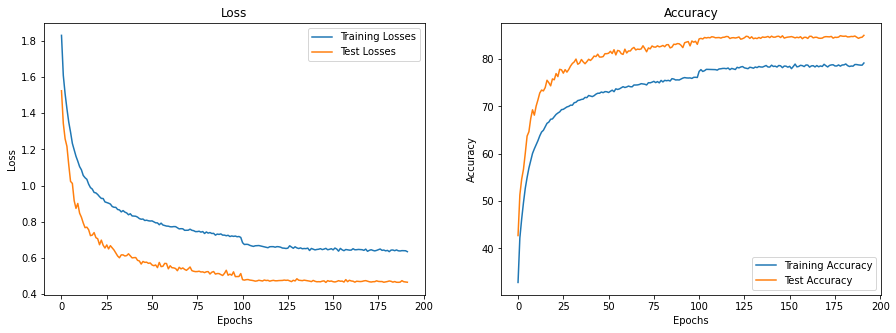

In [15]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(train_losses, label='Training Losses')
axs[0].plot(test_losses, label='Test Losses')
axs[0].legend(loc='upper right')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_title("Loss")

axs[1].plot(train_acc, label='Training Accuracy')
axs[1].plot(test_acc, label='Test Accuracy')
axs[1].legend(loc='lower right')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_title("Accuracy")

plt.show()

In [12]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
net_ret.eval()
with torch.no_grad():
    for data in testloader_mod:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net_ret(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 86 %
Accuracy of   car : 96 %
Accuracy of  bird : 75 %
Accuracy of   cat : 67 %
Accuracy of  deer : 77 %
Accuracy of   dog : 81 %
Accuracy of  frog : 91 %
Accuracy of horse : 92 %
Accuracy of  ship : 90 %
Accuracy of truck : 89 %


# Display wrong prediction

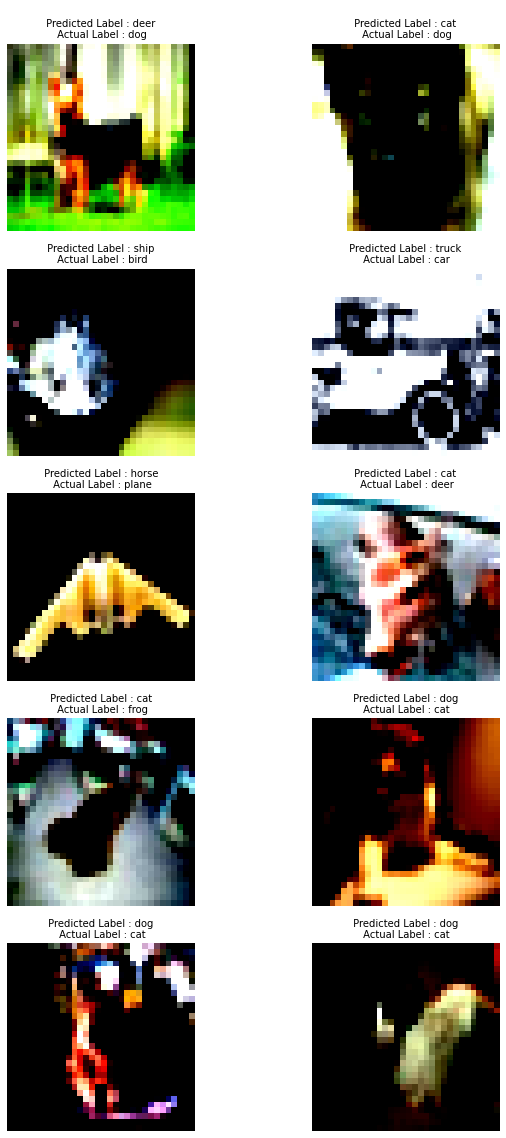

In [13]:
def display_incorrect_pred1(mismatch, n=10 ):
    classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    display_images = mismatch[:n]
    index = 0
    fig = plt.figure(figsize=(10,20))
    for img in display_images:
        image = img[0].squeeze().to('cpu').numpy()
        pred = classes[img[1]]
        actual = classes[img[2]]
        ax = fig.add_subplot(5, 2, index+1)
        ax.axis('off')
        ax.set_title(f'\n Predicted Label : {pred} \n Actual Label : {actual}',fontsize=10) 
        #npimg = image.numpy()
        ax.imshow(np.transpose(image, (1, 2, 0)))        
        #ax.imshow(image)
        index = index + 1
    plt.show()

display_incorrect_pred1(wrong_prediction_list)